<h2 align='center'>MACNM Computational Workshop No. 7 (Jan. 13 Morning) <br>Social Network Analysis by Jonathan Zhu</h2>

### NOTES/CODE/PRACTICE:
1. Basics<br>
    1a. Network/Graph<br>
    1b. Node<br>
    1c. Edge<br>
2. Graph-level Analysis<br>
    2a. Density<br>
    2b. Mean Degree<br>
    2c. Path Length<br>
    2d. Clustering<br>
3. Node-level Analysis
    3a. Degree Centrality<br>
    3b. Closeness Centrality<br>
    3c. Betweenness Centrality<br>
    3d. Eigenvector Centrality<br>
4. Community-level Analysis<br>
    4a. Component<br>
    4b. Community<br>
    4c. Ego Network<br>
5. Advanced Topics<br>
    5a. iGraph (faster algorithms)<br>
    5b. Gephi (better visualization)<br>

### DATA:
1. node_following.csv (structural connection)
2. Profile Homophily
3. Semantic Similarity

<h2>**1. Basics:**</h2>

#### CONCEPTS:

    1a. Network/Graph: 
       i. Node  
       ii. Edge 
    1b. Node:
       i. Person
       ii. Organization, City, etc.
       iii. Concepts, Products, Ideas, etc.
    1c. Edge:
       i. Undirected vs. Directed
       ii. Observable vs. Hidden
       iii. Unweighted vs. Weighted
       iv. etc.

<h4 align="center">Classification of Social Networks</h4>
<table border="1" width="80%">
    <tr>
        <td align="left">Edge</td>
        <td align="center">Undirected</td>
        <td align="center">Directed</td>
    </tr>
    <tr>
        <td align="left">Observed</td>
        <td align="center">Friendship Networks<br> (Facebook, Wechat, etc.)</td>
        <td align="center">News Networks<br> (Twitter, Weibo, etc.)</td>
    </tr>
    <tr>
        <td align="left">Hidden</td>
        <td align="center">Semantic Networks<br> (Words Cooccurrence, etc.)</td>
        <td align="center">Hyperlink Networks</td>
    </tr>
</table>
        

#### CODE:

In [1]:
# Import tools:
import pandas as pd               # for data manipulation
import networkx as nx             # for network analysis
import matplotlib.pyplot as plt   # for visualization
from networkx.algorithms import community   # for community detection
%matplotlib inline                

In [2]:
# Import an edgelist into a dataframe (named as "df_edges"):
df_edges = pd.read_csv('edgelist_following.csv')    # Column "c_e" indicates the edo's language
print (df_edges.head(3))
print (df_edges.tail(3))

   ego  alter  c_e
0    1     97    1
1    1     97    1
2    1    114    1
        ego  alter  c_e
32506  2321   3282    2
32507  2062   3282    2
32508  3283   3069    2


In [3]:
# Import Edges into networkX as a graph (named as "G"): 
G = nx.from_pandas_edgelist(df_edges,'ego','alter',edge_attr='c_e')
nx.info(G)

'Name: \nType: Graph\nNumber of nodes: 2492\nNumber of edges: 21692\nAverage degree:  17.4093'

In [4]:
# Hand-calculate N of edges and N of nodes in G:
edges_n = nx.number_of_edges(G)
nodes_n = nx.number_of_nodes(G)
print (nodes_n, edges_n)

2492 21692


In [5]:
# Check if G is a directed graph:
nx.is_directed(G)

False

In [6]:
# Create a directed graph ("G2") based on G:
G2 = nx.to_directed(G)
nx.is_directed(G2)

True

C:\Users\Jonathan\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


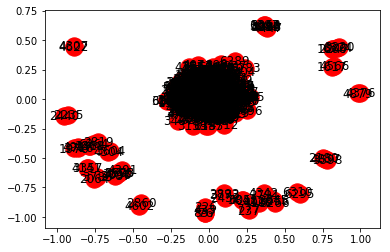

In [7]:
# Draw a simple (and ugly) plot of G (*time consuming*):
nx.draw_networkx(G)

#### PRACTICE:

1a. Import edgelist_en.csv into a graph (named as "Gen"):

1b. Plot Gen with customized colors of nodes and edges:

<h2>**2. Graph-level Analysis (examining global properties of G):**</h2>

#### CONCEPTS:
    2a. Density 
    2b. Mean Degree and Degree Distribution  
    2c. Path Length 
    2d. Clustering   
    2e. Other Graph-level Metrics

#### CODE:

In [8]:
# Calculate the Density ("d") of G:
graph_d1 = edges_n*2 / (nodes_n*(nodes_n-1))    # See NetworkX documentation for the formulae
graph_d2 = nx.density(G)
print ('Hand-calculated density =', graph_d1, 
       '; Function-calculated density =', graph_d2)

Hand-calculated density = 0.006988883898567749 ; Function-calculated density = 0.006988883898567749


In [9]:
# Calculate and plot the Mean Degree of g:
d_mean = edges_n / nodes_n     # Multiply 2 for directed graph
print ('Mean Degree =', d_mean)
df_nodes = pd.DataFrame()      # Create a node-level dataframe for subsequent uses
x = nx.degree(G)               # Extract the value of degree for each node from G
df_nodes['degree'] = x         # Save degree value to the dataframe
df_nodes.head()

Mean Degree = 8.704654895666131


,degree
0,"(1, 6)"
1,"(97, 332)"
2,"(114, 123)"
3,"(15, 279)"
4,"(8, 142)"


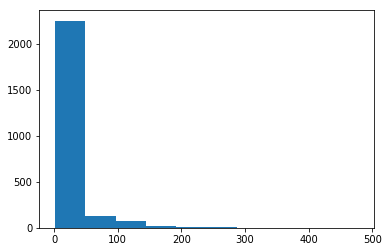

In [10]:
# Plot the distribution of degree to see if it is a "Power-law" shape:
def plot_degree_dist(G):
    degrees = [G.degree(n) for n in G.nodes()]
    plt.hist(degrees)
    plt.show()
plot_degree_dist(G)

In [11]:
# Calculate the (Average Shortest) Path Length ("ASPl") of G (*time consuming*):
for C in nx.connected_component_subgraphs(G):
    print('%.2f' % nx.average_shortest_path_length(C))

3.70
1.50
1.00
1.50
1.60
1.00
1.67
1.33
1.00
1.33
1.00
1.33
1.00
1.57
1.00
1.00
1.00
1.00
1.00
1.33
1.00
1.00
1.00


In [12]:
# Calculate the Average Clustering Coefficient (ACC) of G:
nx.average_clustering(G)

0.2835920405302018

#### PRACTICE:

2a. Examine the density, mean degreem, and average clustering of Gen:

2b. Plot the degree distribution of Gen:

<h2>**3. Node-level Analysis (examining individual properties of nodes):**</h2>

#### CONCEPTS:
    3a. Degree Centrality (popularity)
    3b. Closeness Centrality (approximity)
    3c. Betweenness Centrality (bridging/structural hole)
    3d. Eigenvector Centrality (association with popular nodes)
    3e. Other Node-level Metrics

#### CODE:

In [13]:
# Extract a nodelist from G and save it to a dataframe ("df_nodes"):
df_nodes = pd.DataFrame()
x = nx.nodes(G)
df_nodes['node_ID'] = x
df_nodes.head()

,node_ID
0,1
1,97
2,114
3,15
4,8


In [14]:
# Calculate Degree Centrality of each node:
degree_c = pd.DataFrame.from_dict(dict(nx.degree_centrality(G)),orient='index')

In [15]:
# Calculate Eigenvector Centrality of each node:
eigen_c = pd.DataFrame.from_dict(dict(nx.eigenvector_centrality(G)),orient='index')

In [16]:
# Calculate Betweenness Centrality of each node:  *time consuming*
between_c = pd.DataFrame.from_dict(dict(nx.betweenness_centrality(G)),orient='index')

In [17]:
# Calculate Closeness Centrality of each node:  *time consuming*
close_c = pd.DataFrame.from_dict(dict(nx.closeness_centrality(G)),orient='index')

In [18]:
# Calculate the Clustering Coefficient ("cc") of each node:
cc = pd.DataFrame.from_dict(dict(nx.clustering(G)),orient='index')

In [19]:
# Add the above node-level metrics to df_nodes:
df_nodes = pd.concat([degree_c,eigen_c,between_c,close_c,cc],axis=1)
df_nodes.columns = ['degree_centrality','eigenvector_centrality','betweenness_centrality',
                    'closeness_centrality','clustering']
df_nodes.head()

,degree_centrality,eigenvector_centrality,betweenness_centrality,closeness_centrality,clustering
1,0.002409,0.005984,1.264108e-08,0.290273,0.866667
97,0.133280,0.123199,1.088475e-01,0.401662,0.140829
114,0.049378,0.078374,9.410104e-04,0.313664,0.411169
15,0.112003,0.131819,6.455772e-03,0.325663,0.222609
8,0.057005,0.087556,3.642389e-04,0.305682,0.387174


In [20]:
# Examine the correlation between Centralities and Clustering across nodes:
df_nodes.corr()

,degree_centrality,eigenvector_centrality,betweenness_centrality,closeness_centrality,clustering
degree_centrality,1.000000,0.857598,0.447715,0.376703,0.119407
eigenvector_centrality,0.857598,1.000000,0.086238,0.250556,0.183073
betweenness_centrality,0.447715,0.086238,1.000000,0.165540,-0.054438
closeness_centrality,0.376703,0.250556,0.165540,1.000000,0.159207
clustering,0.119407,0.183073,-0.054438,0.159207,1.000000


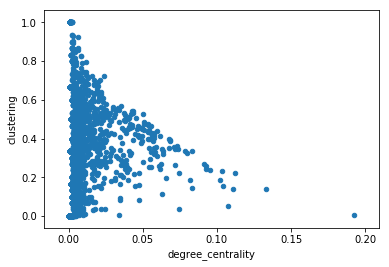

In [21]:
# Plot degree centrality vs. clustering coefficient:
df_nodes.plot.scatter('degree_centrality','clustering')

#### PRACTICE:

3a. Extract nodes from Gen and save into a dataframe (named "df_nodes_en"):

3b. Calculate degree centrality, closeness centrality, betweenness centrality, and clustering coefficient of each node and save the results to df_nodes_en, and examine the correlation among the node characteristics:

<h2>**4. Community-level Analysis (detecting and examining communities):**</h2>

#### CONCEPTS:

    4a. Component (with members connected only within and not outside)
    4b. Community (with members connected strongly within and weakly outside) 
    4c. Ego-centric Network (including an ego and all its neighbors)

#### CODE:

In [22]:
# Detect components in G:
nx.number_connected_components(G)

23

In [23]:
# Extract the largest component from G:
comp_max = max(nx.connected_components(G), key=len)
len(comp_max)

2429

In [24]:
# Detect and extract communities in G and save into a dataframe ("df_communities"):  *time consuming*
df_communities = pd.DataFrame()
x = community.greedy_modularity_communities(G)
df_communities['members'] = x
df_communities.head()

,members
0,"(6144, 6145, 2052, 6150, 2055, 4104, 4105, 10,..."
1,"(1, 4, 6, 8, 14, 15, 17, 18, 19, 20, 21, 22, 2..."
2,"(4098, 2051, 6148, 2053, 6151, 6155, 4107, 615..."
3,"(4611, 1541, 6158, 2579, 2071, 3613, 6177, 617..."
4,"(4484, 2824, 3208, 1813, 4118, 1815, 3609, 643..."


In [25]:
# Calculate N of members (size) of each community:
df_communities['size'] = df_communities['members'].apply(lambda x: len(x))
print(df_communities.head(10))
print(df_communities.tail(3))

                                             members  size
0  (6144, 6145, 2052, 6150, 2055, 4104, 4105, 10,...  1119
1  (1, 4, 6, 8, 14, 15, 17, 18, 19, 20, 21, 22, 2...   529
2  (4098, 2051, 6148, 2053, 6151, 6155, 4107, 615...   460
3  (4611, 1541, 6158, 2579, 2071, 3613, 6177, 617...   120
4  (4484, 2824, 3208, 1813, 4118, 1815, 3609, 643...    21
5  (1410, 2694, 4775, 4123, 4041, 1929, 2857, 317...    17
6  (3680, 3808, 2271, 1864, 3369, 1484, 6190, 453...    15
7  (4640, 4292, 4102, 2246, 2662, 4236, 3662, 321...    14
8  (6211, 2340, 4901, 75, 6347, 1007, 4527, 3698,...    13
9  (3396, 4324, 6280, 4329, 2474, 2252, 2001, 395...    11
         members  size
61  (4602, 2860)     2
62  (4902, 4126)     2
63  (6310, 6295)     2


In [26]:
# Select the largest community:
cm_max = df_communities[['members']][df_communities['size'] > 1000]
cm_max

,members
0,"(6144, 6145, 2052, 6150, 2055, 4104, 4105, 10,..."


In [28]:
# Save the largest community into a dataframe ("df_cmmax"):
df_cm_max = cm_max.apply(lambda x: pd.DataFrame(x.tolist(),index=x.index).stack().rename(x.name))
print(df_cm_max.describe())
print(df_cm_max.head())

           members
count  1119.000000
mean   3492.515639
std    1468.025009
min      10.000000
25%    2327.000000
50%    3309.000000
75%    4441.500000
max    6509.000000
     members
0 0     6144
  1     6145
  2     2052
  3     6150
  4     2055


In [29]:
# Export above df files in csv format for future use:
df_nodes.to_csv('df_nodes.csv',encoding='utf-8')
df_communities.to_csv('df_communities.csv',encoding='utf-8')
df_cm_max.to_csv('df_largest_community.csv',encoding='utf-8')

#### PRACTICE:

4a. Examine the number of components and the size of the largest component in Gen:

4b. Detect and extract communities from Gen:

4c. Examine the typological properties (mean degree, average clustering, and average path length) of each community (take home if necessary):

<h2>**5. Advanced Tools:**</h2>

   5a. [python-igraph](https://igraph.org/python/) (more powerful than NetworkX)<br>
   5b. [graph-tool](https://graph-tool.skewed.de/) (fatest of all)<br>
   5c. [Gephi](https://gephi.org/) (more sophisticated visualization)